In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder

In [2]:
coke_df = pd.read_csv('Coke_Data.csv')
coke_df.head()

,YEAR,QTR,SALES,T,Q1,Q2,Q3
0,1980,1,1215.655,1,1,0,0
1,1980,2,1549.533,2,0,1,0
2,1980,3,1418.384,3,0,0,1
3,1980,4,1437.177,4,0,0,0
4,1981,1,1346.462,5,1,0,0


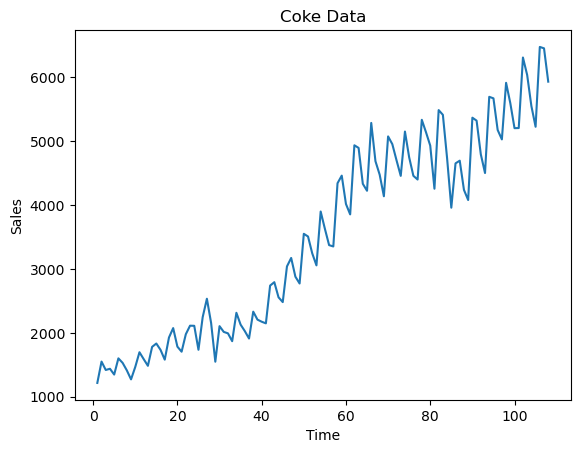

In [8]:
plt.plot(coke_df['T'], coke_df['SALES'])
plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('Coke Data')
plt.show()

In [6]:
X = coke_df.drop(columns=['SALES'])
y = coke_df['SALES']
X = sm.add_constant(X)

regression = sm.OLS(y,X).fit()

print(regression.summary())

                            OLS Regression Results                            
Dep. Variable:                  SALES   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     425.9
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           4.24e-63
Time:                        10:11:46   Log-Likelihood:                -791.26
No. Observations:                 108   AIC:                             1593.
Df Residuals:                     103   BIC:                             1606.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0100      0.004     -2.332      0.0

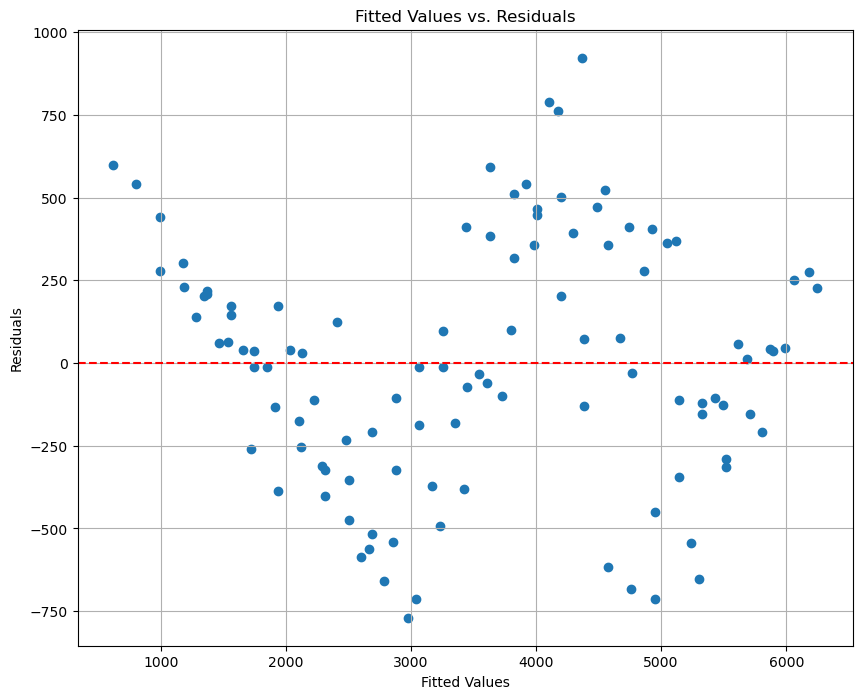

In [7]:
residuals = regression.resid

plt.figure(figsize=(10,8))
plt.scatter(regression.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Fitted Values vs. Residuals')
plt.grid(True)
plt.show()

In [9]:
#Ljung-Box Chi-Square Test
sm.stats.acorr_ljungbox(residuals, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,325.374987,6.632359e-64


In [10]:
#Create the shift column
coke_df['SALES_1']  = coke_df['SALES'].shift(1)

print(coke_df)

     YEAR  QTR     SALES    T  Q1  Q2  Q3   SALES_1
0    1980    1  1215.655    1   1   0   0       NaN
1    1980    2  1549.533    2   0   1   0  1215.655
2    1980    3  1418.384    3   0   0   1  1549.533
3    1980    4  1437.177    4   0   0   0  1418.384
4    1981    1  1346.462    5   1   0   0  1437.177
..    ...  ...       ...  ...  ..  ..  ..       ...
103  2005    4  5551.000  104   0   0   0  6037.000
104  2006    1  5226.000  105   1   0   0  5551.000
105  2006    2  6476.000  106   0   1   0  5226.000
106  2006    3  6454.000  107   0   0   1  6476.000
107  2006    4  5932.000  108   0   0   0  6454.000

[108 rows x 8 columns]


In [11]:
#Drop the first row with the missing SALES_1 value
coke_df_1 = coke_df.dropna()

In [12]:
coke_df_1

,YEAR,QTR,SALES,T,Q1,Q2,Q3,SALES_1
1,1980,2,1549.533,2,0,1,0,1215.655
2,1980,3,1418.384,3,0,0,1,1549.533
3,1980,4,1437.177,4,0,0,0,1418.384
4,1981,1,1346.462,5,1,0,0,1437.177
5,1981,2,1600.247,6,0,1,0,1346.462
...,...,...,...,...,...,...,...,...
103,2005,4,5551.000,104,0,0,0,6037.000
104,2006,1,5226.000,105,1,0,0,5551.000
105,2006,2,6476.000,106,0,1,0,5226.000
106,2006,3,6454.000,107,0,0,1,6476.000


In [13]:
X = coke_df_1.drop(columns=['SALES'])
y = coke_df_1['SALES']
X = sm.add_constant(X)

regression_lag = sm.OLS(y,X).fit()

print(regression_lag.summary())

                            OLS Regression Results                            
Dep. Variable:                  SALES   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     922.4
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           1.42e-82
Time:                        10:28:12   Log-Likelihood:                -730.97
No. Observations:                 107   AIC:                             1474.
Df Residuals:                     101   BIC:                             1490.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0183      0.003     -6.703      0.0

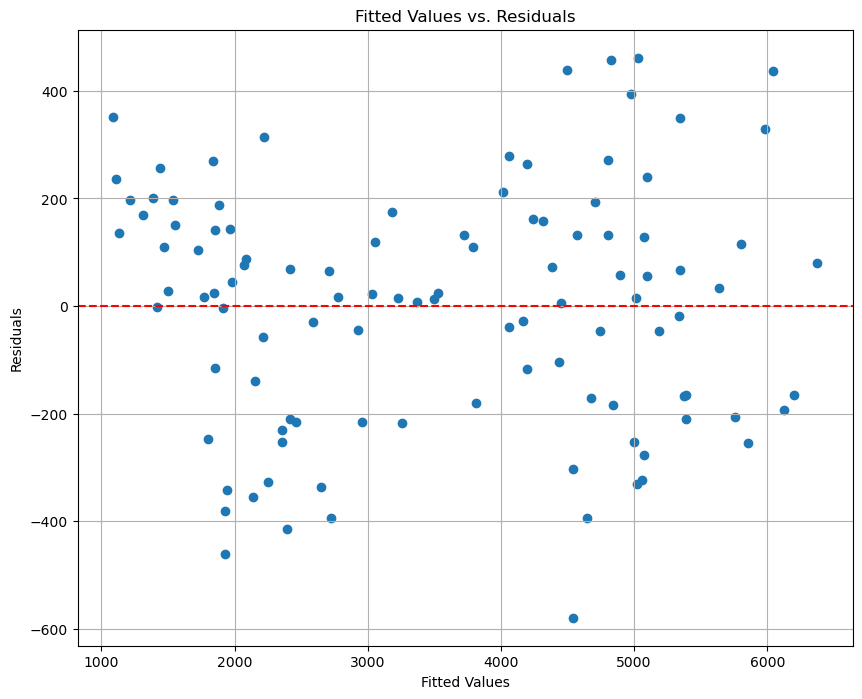

In [14]:
residuals = regression_lag.resid

plt.figure(figsize=(10,8))
plt.scatter(regression_lag.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Fitted Values vs. Residuals')
plt.grid(True)
plt.show()

In [15]:
sm.stats.acorr_ljungbox(residuals, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,72.527347,1.438002e-11
